In [3]:
# https://pypi.org/project/verstack/

# inicjacja bibliotek oraz przestrzeni nazw
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os

data_path = "E:\page_ds\LightGBM_step_by_step"
pict_path = os.path.join(data_path, r"foto")

MainData = pd.read_csv(os.path.join(data_path, "train.csv"))

#podział na cechy oraz zmienną celu
y = MainData['target'].copy()
X = MainData.drop(columns=['id','target']).copy()

#lista cech kategorialnych
X_cat_col = list(X.loc[:,X.dtypes!=np.number].columns)


for c in X.columns:
    col_type = X[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        X[c] = X[c].astype('category')

        
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=128262)
    

In [ ]:
# poniższy kod wywala błąd konwersji wartości typu string do zmiennej numerycznej pomimo że przekonwertowałem 
# wszystkie charakterystyki do typu pd.Categorical. Prawdopodobnie Tuner nie łyka zmiennych nienumerycznych
from verstack import LGBMTuner

tuner = LGBMTuner(metric = 'balanced_accuracy', verbosity = 0)
tuner.fit(X_train, y_train)

pred = tuner.predict(X_test)


Sprawdze jak zadziała metoda gdy pozbędę się zmiennych nienumerycznych


task                             : train
learning_rate                    : 0.04
num_leaves                       : 208
colsample_bytree                 : 0.6010327476381987
subsample                        : 0.7757538417705181
bagging_freq                     : 1
max_depth                        : -1
verbosity                        : -1
reg_alpha                        : 2.1157112362404626e-08
reg_lambda                       : 2.847799805414407e-07
min_split_gain                   : 0.0
zero_as_missing                  : False
max_bin                          : 255
min_data_in_bin                  : 3
random_state                     : 42
device_type                      : cpu
num_classes                      : 1
objective                        : binary
metric                           : binary_logloss
num_threads                      : 10
min_sum_hessian_in_leaf          : 0.21311279131033847
n_estimators                     : 701


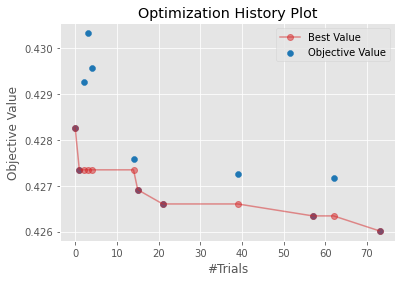

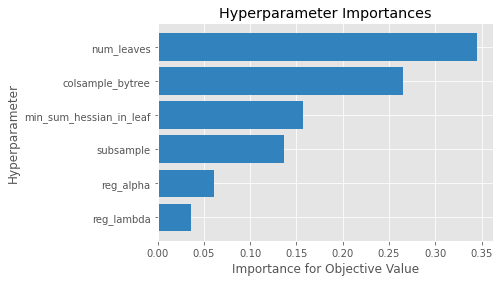

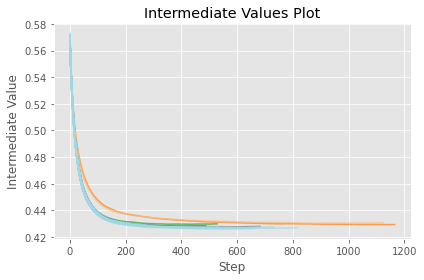

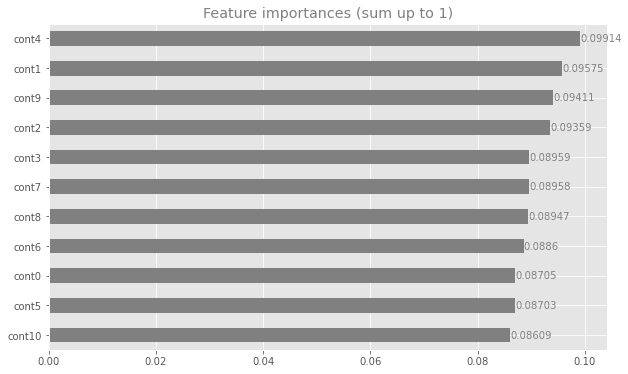



Time elapsed for fit execution: 7 min 48.62 sec


In [20]:
#wybór tylko cech numerycznych
X_col_num = list(X.loc[:,X.dtypes ==np.number].columns)

X_train, X_test, y_train, y_test = train_test_split(
    X[X_col_num], y, test_size = 0.2, random_state=128262)
#maszynka
tuner = LGBMTuner(metric = 'balanced_accuracy', verbosity = 0)
tuner.fit(X_train, y_train)

#predykcja
pred = tuner.predict(X_test)

Można również puścić poniższe kody, otrzymamy powyższe wykresy ale w formie interaktywnej

In [16]:
tuner.plot_importances(interactive = True)

In [ ]:
tuner.plot_intermediate_values(interactive = True)

In [ ]:
tuner.plot_param_importances(interactive = True)

Jeszcze spróbuję narysować macież pomyłek oraz wykres krzywej ROC

Accuracy for validation set: 0.8088
Accuracy for train set: 0.8743
Wartość parametru Gini na zbiorze walidacyjnym to: 0.6550
Wartość parametru Gini na zbiorze treningowym to: 0.8855

Confusion Matrix


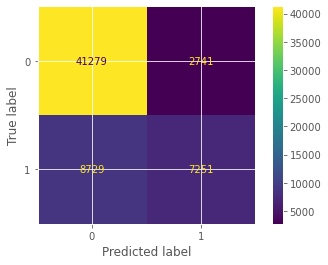

In [26]:
import matplotlib.pyplot as plt
import lightgbm as lgb
# dane są nisko niezbalansowane przez co powinniśmy rozpatrzyć losowanie warstwowe
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score


auc_val = roc_auc_score(y_test, tuner.predict_proba(X_test))
auc_train = roc_auc_score(y_train, tuner.predict_proba(X_train))

print("Accuracy for validation set: {0:.4f}".format(accuracy_score(y_test, pred)))
print("Accuracy for train set: {0:.4f}".format(accuracy_score(y_train, tuner.predict(X_train))))

print("Wartość parametru Gini na zbiorze walidacyjnym to: {0:.4f}".format(2*auc_val-1)) # Gini = 2*AUC-1
print("Wartość parametru Gini na zbiorze treningowym to: {0:.4f}".format(2*auc_train-1)) # Gini = 2*AUC-1

print("\nConfusion Matrix")
#print(plot_confusion_matrix(xgb_clf, X_test, y_test))
cm = confusion_matrix(y_test, pred, labels=tuner.target_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=tuner.target_classes)
print(disp.plot())
#wyk = disp.plot()
#plt.savefig(os.path.join(pict_path,"1_conf_matrix_clf.png"), format="png" , dpi=300, facecolor="White")
plt.show()

Komentarze:
    * metoda ma tendencje do przetrenowania 
    * wadą jest to, że nie można 